In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, mean_absolute_error

In [2]:
df = pd.read_csv("survey_results_public_2023.csv") #load dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

## Data Cleaning 
Cleaned the messy Stack Overflow survery data that contained missing values, and inconsistent formats.
- Removed rows containing missing or invalid salary data.
- Removed irrelevant and redundant features.
- Handle outliers and extreme values.
- Normalized the country and coding experience fields.

In [3]:
missing_percent = (df.isnull().sum() / len(df)*100).sort_values(ascending=False)
print("Missing data percentage:\n", missing_percent[missing_percent > 55])
print("\nTotal columns with more than 50% misssing data:", (missing_percent > 55).sum())

Missing data percentage:
 AINextVery similar                     97.061132
AINextSomewhat similar                 93.005472
AINextNeither different nor similar    92.600691
AINextVery different                   85.803507
AIDevWantToWorkWith                    78.037540
AIToolNot interested in Using          76.375807
AINextSomewhat different               73.870874
AIDevHaveWorkedWith                    70.954431
AIToolInterested in Using              63.241164
AIToolCurrently Using                  59.480400
Industry                               58.766146
LearnCodeCoursesCert                   58.427521
AIAcc                                  56.725422
dtype: float64

Total columns with more than 50% misssing data: 13


In [4]:
columns_to_drop = missing_percent[missing_percent > 55].index.tolist()

In [5]:
df_removed_missing = df.drop(columns=columns_to_drop)

print(f"Dropped {len(columns_to_drop)} columns")
print(f"Remaining columns:\n{df_removed_missing.columns}")

Dropped 13 columns
Remaining columns:
Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence',
       'TechList', 'BuyNewTool', 'Country', 'Currency', 'CompTotal',
       'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith',
       'OpSysPersonal use', 'OpSysProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith',
       'AISearchHaveWorkedWith', 'AISe

In [6]:
columns_to_keep = ['Age', 'Employment', 'RemoteWork',
       'EdLevel', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'Country', 
       'LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith',
       'WebframeHaveWorkedWith', 'ToolsTechHaveWorkedWith', 'WorkExp',
       'ConvertedCompYearly']

In [7]:
df_clean = df_removed_missing[columns_to_keep]

print(f"Remaining columns:\n{df_clean.columns}")

Remaining columns:
Index(['Age', 'Employment', 'RemoteWork', 'EdLevel', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Country',
       'LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith',
       'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith',
       'ToolsTechHaveWorkedWith', 'WorkExp', 'ConvertedCompYearly'],
      dtype='object')


In [8]:
df_clean.head()

,Age,Employment,RemoteWork,EdLevel,YearsCode,YearsCodePro,DevType,OrgSize,Country,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,ToolsTechHaveWorkedWith,WorkExp,ConvertedCompYearly
0,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,United States of America,HTML/CSS;JavaScript;Python,Supabase,Amazon Web Services (AWS);Netlify;Vercel,Next.js;React;Remix;Vue.js,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,10.0,285000.0
2,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",27,23,"Developer, back-end","5,000 to 9,999 employees",United States of America,Bash/Shell (all shells);Go,NaN,Amazon Web Services (AWS);Google Cloud;OpenSta...,NaN,Cargo;Docker;Kubernetes;Make;Nix,23.0,250000.0
3,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12,7,"Developer, front-end",100 to 499 employees,United States of America,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,PostgreSQL;Redis,Cloudflare;Heroku,Node.js;React;Ruby on Rails;Vue.js;WordPress,Homebrew;npm;Vite;Webpack;Yarn,7.0,156000.0
4,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,4,"Developer, full-stack",20 to 99 employees,Philippines,HTML/CSS;JavaScript;TypeScript,BigQuery;Elasticsearch;MongoDB;PostgreSQL,Amazon Web Services (AWS);Firebase;Heroku;Netl...,Express;Gatsby;NestJS;Next.js;Node.js;React,Docker;npm;Webpack;Yarn,6.0,23456.0


In [9]:
missing_percent = (df_clean.isnull().sum() / len(df)*100).sort_values(ascending=False)
print("Missing data percentage:\n", missing_percent)

Missing data percentage:
 WorkExp                    51.135854
ConvertedCompYearly        46.157382
PlatformHaveWorkedWith     28.655364
OrgSize                    27.068757
YearsCodePro               25.843201
WebframeHaveWorkedWith     24.943936
DatabaseHaveWorkedWith     17.658997
RemoteWork                 17.238518
DevType                    13.805167
ToolsTechHaveWorkedWith    12.670434
LanguageHaveWorkedWith      2.291891
YearsCode                   1.961114
Employment                  1.441963
EdLevel                     1.357867
Country                     1.357867
Age                         0.000000
dtype: float64


In [10]:
print("\nUnique values in key columns:")
for col in ["Country", "DevType", "EdLevel", "Employment"]:
    if col in df_clean.columns:
        print(f"{col}: {df_clean[col].nunique()} unique values")


Unique values in key columns:
Country: 185 unique values
DevType: 33 unique values
EdLevel: 8 unique values
Employment: 106 unique values


In [11]:
df_clean["WorkExp"] = df_clean['WorkExp'].fillna(0)

C:\Users\patel\AppData\Local\Temp\ipykernel_4220\1861607651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["WorkExp"] = df_clean['WorkExp'].fillna(0)


In [12]:
missing_percent = (df_clean.isnull().sum() / len(df)*100).sort_values(ascending=False)
print("Missing data percentage:\n", missing_percent)

Missing data percentage:
 ConvertedCompYearly        46.157382
PlatformHaveWorkedWith     28.655364
OrgSize                    27.068757
YearsCodePro               25.843201
WebframeHaveWorkedWith     24.943936
DatabaseHaveWorkedWith     17.658997
RemoteWork                 17.238518
DevType                    13.805167
ToolsTechHaveWorkedWith    12.670434
LanguageHaveWorkedWith      2.291891
YearsCode                   1.961114
Employment                  1.441963
Country                     1.357867
EdLevel                     1.357867
Age                         0.000000
WorkExp                     0.000000
dtype: float64


In [13]:
df_model = df_clean.dropna().copy()

print(f"Final dataset shape: {df_model.shape}")

Final dataset shape: (28988, 16)


In [14]:
print("\nSalary Stats:")
print(df_model["ConvertedCompYearly"].describe())

print(f"\nSalaries > $500k: {(df_model["ConvertedCompYearly"] > 500000).sum()}")
print(f"\nSalaries < $10K: {(df_model["ConvertedCompYearly"] < 10000).sum()}")


Salary Stats:
count    2.898800e+04
mean     9.801897e+04
std      2.776430e+05
min      1.000000e+00
25%      4.497800e+04
50%      7.696600e+04
75%      1.250000e+05
max      3.657318e+07
Name: ConvertedCompYearly, dtype: float64

Salaries > $500k: 117

Salaries < $10K: 1916


In [15]:
df_model["ConvertedCompYearly"].explode().sort_values(ascending=False)

19679    36573181.0
55102    17612921.0
83679    10319366.0
47797     9915585.0
88347     9203683.0
            ...    
5724            1.0
2243            1.0
64955           1.0
17985           1.0
37160           1.0
Name: ConvertedCompYearly, Length: 28988, dtype: float64

In [16]:
(df_model["Employment"] == "Employed, full-time").sum()

np.int64(23086)

In [17]:
df_model_fullTime = df_model[df_model["Employment"] == "Employed, full-time"]

In [18]:
df_model_fullTime.head()

,Age,Employment,RemoteWork,EdLevel,YearsCode,YearsCodePro,DevType,OrgSize,Country,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,ToolsTechHaveWorkedWith,WorkExp,ConvertedCompYearly
1,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,United States of America,HTML/CSS;JavaScript;Python,Supabase,Amazon Web Services (AWS);Netlify;Vercel,Next.js;React;Remix;Vue.js,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,10.0,285000.0
3,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12,7,"Developer, front-end",100 to 499 employees,United States of America,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,PostgreSQL;Redis,Cloudflare;Heroku,Node.js;React;Ruby on Rails;Vue.js;WordPress,Homebrew;npm;Vite;Webpack;Yarn,7.0,156000.0
5,35-44 years old,"Employed, full-time",Remote,Some college/university study without earning ...,21,21,"Developer, back-end",100 to 499 employees,United Kingdom of Great Britain and Northern I...,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,BigQuery;Cloud Firestore;PostgreSQL;Redis,Amazon Web Services (AWS);Cloudflare;Google Cloud,Angular;Express;NestJS;Node.js,Docker;Homebrew;Kubernetes;npm;pnpm;Terraform,22.0,96828.0
6,35-44 years old,"Employed, full-time",Remote,Some college/university study without earning ...,4,3,"Developer, full-stack","1,000 to 4,999 employees",United States of America,Ada;Clojure;Elixir;Go;HTML/CSS;Java;JavaScript...,MariaDB;Microsoft SQL Server;MySQL;PostgreSQL;...,Amazon Web Services (AWS);Digital Ocean,AngularJS;jQuery;Node.js;Phoenix;Ruby on Rails...,Bun;Cargo;Chocolatey;Docker;Homebrew;Kubernete...,4.0,135000.0
7,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,3,"Developer, full-stack",10 to 19 employees,United States of America,Go;HTML/CSS;JavaScript;Python;Rust;SQL;TypeScript,Dynamodb;MongoDB;MySQL;Redis;SQLite,Amazon Web Services (AWS);Fly.io;Netlify;Vercel,Angular;Express;Next.js;Node.js;React,Ansible;Cargo;Docker;Homebrew;Make;npm;Pip;pnp...,5.0,80000.0


In [19]:
df_model_fullTime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23086 entries, 1 to 89170
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      23086 non-null  object 
 1   Employment               23086 non-null  object 
 2   RemoteWork               23086 non-null  object 
 3   EdLevel                  23086 non-null  object 
 4   YearsCode                23086 non-null  object 
 5   YearsCodePro             23086 non-null  object 
 6   DevType                  23086 non-null  object 
 7   OrgSize                  23086 non-null  object 
 8   Country                  23086 non-null  object 
 9   LanguageHaveWorkedWith   23086 non-null  object 
 10  DatabaseHaveWorkedWith   23086 non-null  object 
 11  PlatformHaveWorkedWith   23086 non-null  object 
 12  WebframeHaveWorkedWith   23086 non-null  object 
 13  ToolsTechHaveWorkedWith  23086 non-null  object 
 14  WorkExp                  23

In [20]:
df_model_fullTime["ConvertedCompYearly"].explode().sort_values(ascending=False)


55102    17612921.0
83679    10319366.0
88347     9203683.0
34996     7435143.0
79949     4451577.0
            ...    
37160           1.0
41416           1.0
8862            1.0
64955           1.0
17985           1.0
Name: ConvertedCompYearly, Length: 23086, dtype: float64

In [21]:
df_model_fullTime["ConvertedCompYearly"].describe()

count    2.308600e+04
mean     9.743679e+04
std      1.803547e+05
min      1.000000e+00
25%      4.551300e+04
50%      7.710400e+04
75%      1.250000e+05
max      1.761292e+07
Name: ConvertedCompYearly, dtype: float64

In [22]:
import pandas as pd
import numpy as np

bins = [
    0,
    1_000,
    2_000,
    3_000,
    4_000,
    5_000,
    10_000,
    100_000,
    200_000,
    300_000,
    400_000,
    500_000,
    np.inf
]

labels = [
    "0-1k",
    "1k-2k",
    "2k-3k",
    "3k-4k",
    "4k-5k",
    "5k-10k",
    "10k-100k",
    "100k-200k",
    "200k-300k",
    "300k-400k",
    "400k-500k",
    "500k+"
]

salary_bins = pd.cut(
    df_model_fullTime["ConvertedCompYearly"],
    bins=bins,
    labels=labels,
    right=False
)

salary_bins.value_counts().sort_index()

ConvertedCompYearly
0-1k           290
1k-2k          142
2k-3k          122
3k-4k          154
4k-5k          135
5k-10k         593
10k-100k     13285
100k-200k     6507
200k-300k     1378
300k-400k      266
400k-500k       97
500k+          117
Name: count, dtype: int64

In [23]:
import pandas as pd

def remove_outliers_iqr(group, column='ConvertedCompYearly', k=1.5):
    Q1 = group[column].quantile(0.25)
    Q3 = group[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - k * IQR
    upper = Q3 + k * IQR
    return group[(group[column] >= lower) & (group[column] <= upper)]

# apply per country
df_model_fullTime = df_model_fullTime.groupby('Country', group_keys=False).apply(remove_outliers_iqr)

df_model_fullTime = df_model_fullTime[(df_model_fullTime['ConvertedCompYearly'] >= 2000)]

C:\Users\patel\AppData\Local\Temp\ipykernel_4220\3528880586.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_model_fullTime = df_model_fullTime.groupby('Country', group_keys=False).apply(remove_outliers_iqr)


In [24]:
df_model_fullTime["ConvertedCompYearly"].describe()

count     21598.000000
mean      89038.169877
std       59475.181015
min        2023.000000
25%       46411.500000
50%       75404.000000
75%      120000.000000
max      325000.000000
Name: ConvertedCompYearly, dtype: float64

In [25]:
df_model_fullTime['Country'].value_counts()

Country
United States of America                                6085
United Kingdom of Great Britain and Northern Ireland    1794
Germany                                                 1573
Canada                                                  1000
India                                                    917
                                                        ... 
Oman                                                       1
Mozambique                                                 1
Monaco                                                     1
Swaziland                                                  1
Yemen                                                      1
Name: count, Length: 150, dtype: int64

## Data Visualization
Visualized the data to get a better understanding of the data and to uncover unexpected values that need to be addressed.
- Revealed outliers in the annual salary compensation values
    - Values exceeding multiple millions per year ($17M / yr)
    - Unrealistically low wages ($1 / yr)
- Revealed the most important programming languages and tools that can be used as features.

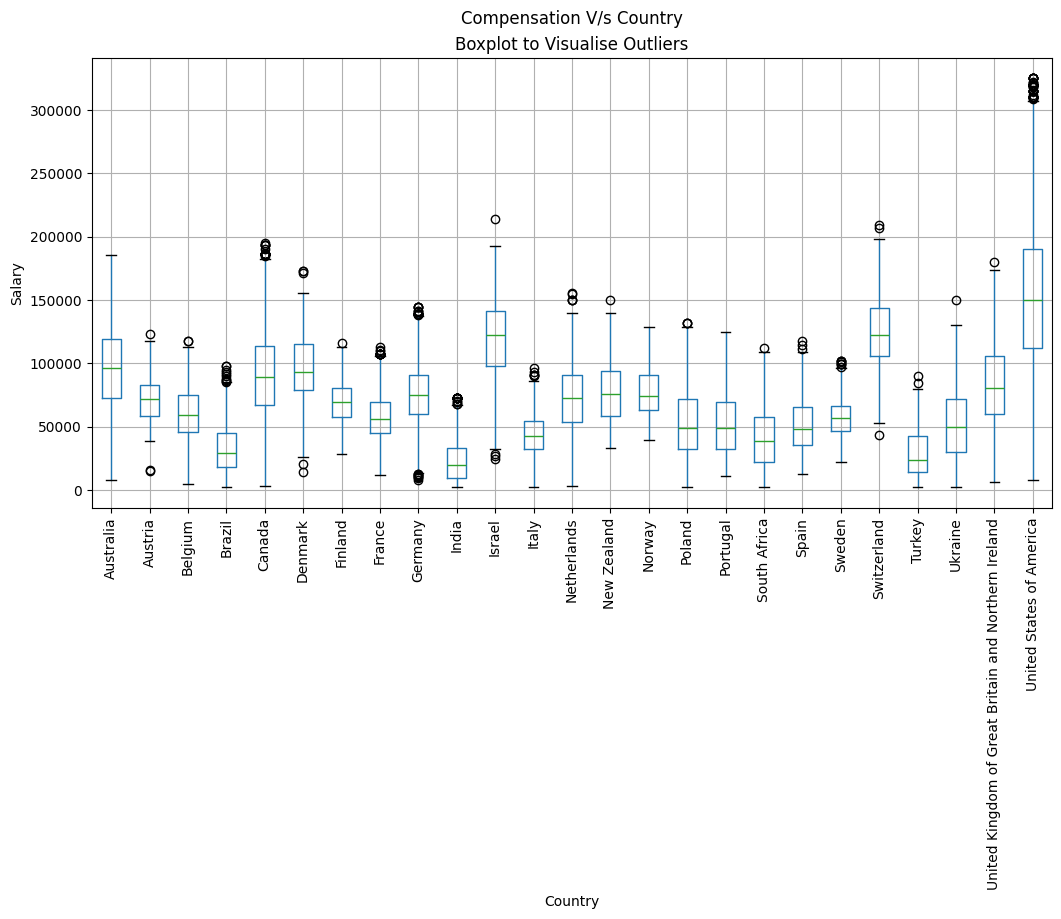

In [26]:
import matplotlib.pyplot as plt

# count respondents per country and get top 25 (based off of enough data points)
top_countries = df_model_fullTime['Country'].value_counts().nlargest(25).index

# Filter the DataFrame to only include these countries
df_top = df_model_fullTime[df_model_fullTime['Country'].isin(top_countries)]

# Create the boxplot
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
plt.ticklabel_format(style='plain')

df_top.boxplot(column="ConvertedCompYearly", by="Country", ax=ax)
plt.suptitle("Compensation V/s Country")
plt.title('Boxplot to Visualise Outliers')
plt.ylabel("Salary")
plt.xticks(rotation=90)

plt.show()


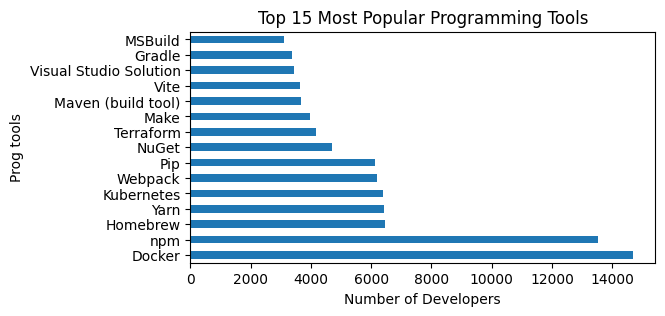

In [27]:
plt.figure(figsize=(6, 3))
prog_tools = df_model_fullTime['ToolsTechHaveWorkedWith'].str.split(';', expand=True).stack().value_counts().nlargest(15)
prog_tools.plot(kind='barh')
plt.title('Top 15 Most Popular Programming Tools')
plt.xlabel('Number of Developers')
plt.ylabel('Prog tools')
plt.show()

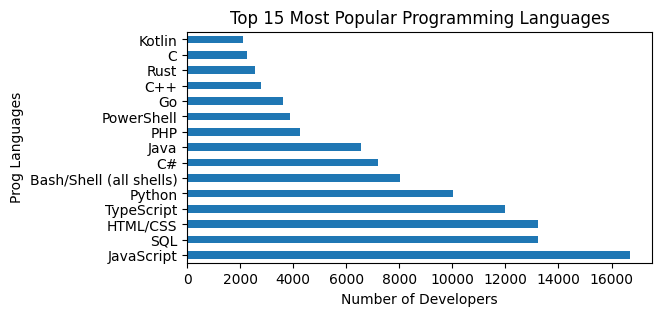

In [28]:
plt.figure(figsize=(6, 3))
prog_languages = df_model_fullTime['LanguageHaveWorkedWith'].str.split(';', expand=True).stack().value_counts().nlargest(15)
prog_languages.plot(kind='barh')
plt.title('Top 15 Most Popular Programming Languages')
plt.xlabel('Number of Developers')
plt.ylabel('Prog Languages')
plt.show()

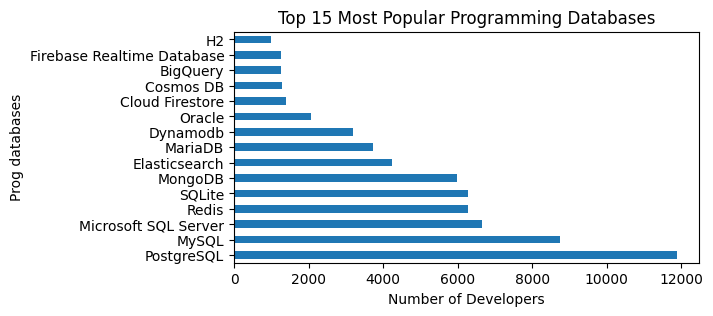

In [29]:
plt.figure(figsize=(6, 3))
prog_databases = df_model_fullTime['DatabaseHaveWorkedWith'].str.split(';', expand=True).stack().value_counts().nlargest(15)
prog_databases.plot(kind='barh')
plt.title('Top 15 Most Popular Programming Databases')
plt.xlabel('Number of Developers')
plt.ylabel('Prog databases')
plt.show()

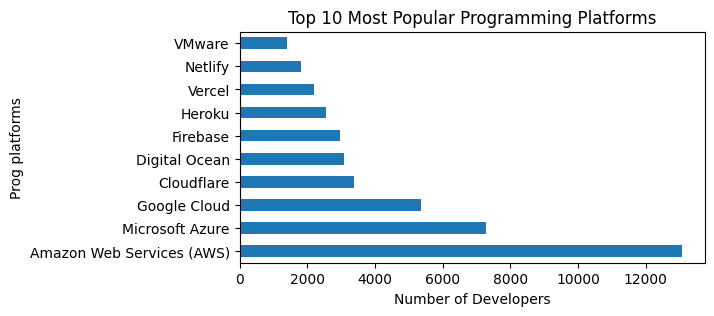

In [30]:
plt.figure(figsize=(6, 3))
prog_platforms = df_model_fullTime['PlatformHaveWorkedWith'].str.split(';', expand=True).stack().value_counts().nlargest(10)
prog_platforms.plot(kind='barh')
plt.title('Top 10 Most Popular Programming Platforms')
plt.xlabel('Number of Developers')
plt.ylabel('Prog platforms')
plt.show()

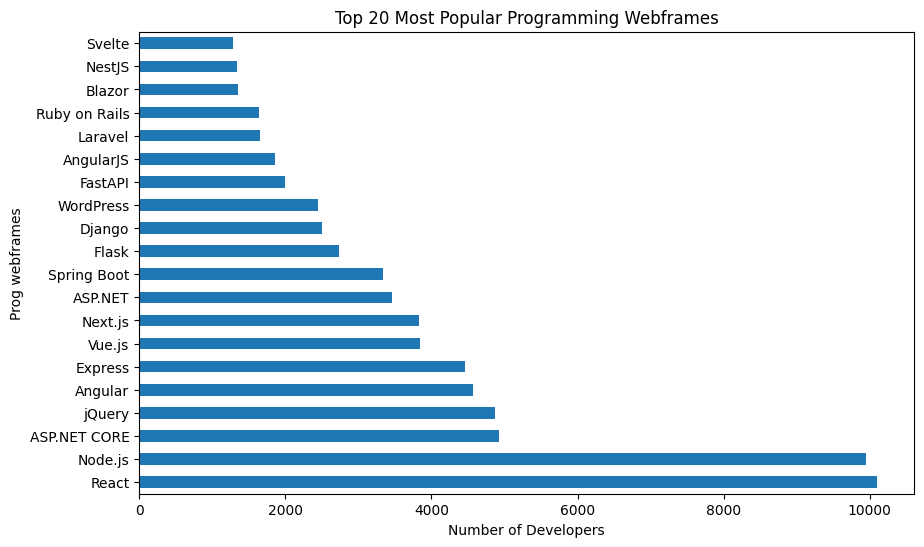

In [31]:
plt.figure(figsize=(10, 6))
prog_webframes = df_model_fullTime['WebframeHaveWorkedWith'].str.split(';', expand=True).stack().value_counts().nlargest(20)
prog_webframes.plot(kind='barh')
plt.title('Top 20 Most Popular Programming Webframes')
plt.xlabel('Number of Developers')
plt.ylabel('Prog webframes')
plt.show()

## Data Preprocessing & Analysis
The data is turned into numerical values so it can be used to train the machine learning model.
- Categorical variables are converted to numerical values (country, employment type, type of developer).
- Programming languages and technologies are converted from multi-select data into boolean values.
- Ordinal features are assigned ordered numerical values (age, education level, organization size).
- Salary values are filtered using interquartile ranges to reduce skew.
- Features are selected to only use important and predictable variables.
- Highly correlated feature pairs are unified (reduced multicollinearity).

The features are observed to avoid skewed results.
- Inspected correlation between variables.
- Reduced multicolinearity.

In [32]:
# languages

df_model_fullTime['Has_JavaScript'] = df_model_fullTime['LanguageHaveWorkedWith'].str.contains('JavaScript', na=False).astype(int)
df_model_fullTime['Has_SQL'] = df_model_fullTime['LanguageHaveWorkedWith'].str.contains('SQL', na=False).astype(int)
df_model_fullTime['Has_HTML_CSS'] = df_model_fullTime['LanguageHaveWorkedWith'].str.contains('HTML/CSS', na=False).astype(int)
df_model_fullTime['Has_TypeScript'] = df_model_fullTime['LanguageHaveWorkedWith'].str.contains('TypeScript', na=False).astype(int)
df_model_fullTime['Has_Python'] = df_model_fullTime['LanguageHaveWorkedWith'].str.contains('Python', na=False).astype(int)
df_model_fullTime['Has_CSharp'] = df_model_fullTime['LanguageHaveWorkedWith'].str.contains('C#', na=False).astype(int)
df_model_fullTime['Has_Bash_Shell'] = df_model_fullTime['LanguageHaveWorkedWith'].str.contains('Bash/Shell (all shells)', na=False).astype(int)
df_model_fullTime['Has_Java'] = df_model_fullTime['LanguageHaveWorkedWith'].str.contains('Java', na=False).astype(int)
df_model_fullTime['Has_PowerShell'] = df_model_fullTime['LanguageHaveWorkedWith'].str.contains('PowerShell', na=False).astype(int)
df_model_fullTime['Has_Go'] = df_model_fullTime['LanguageHaveWorkedWith'].str.contains('Go', na=False).astype(int)
df_model_fullTime['Has_PHP'] = df_model_fullTime['LanguageHaveWorkedWith'].str.contains('PHP', na=False).astype(int)
df_model_fullTime['Has_CPP'] = df_model_fullTime['LanguageHaveWorkedWith'].str.contains('C++', na=False).astype(int)
df_model_fullTime['Has_C'] = df_model_fullTime['LanguageHaveWorkedWith'].str.contains('C', na=False).astype(int)
df_model_fullTime['Has_Rust'] = df_model_fullTime['LanguageHaveWorkedWith'].str.contains('Rust', na=False).astype(int)

#databases

df_model_fullTime['Has_PostgreSQL'] = df_model_fullTime['DatabaseHaveWorkedWith'].str.contains('PostgreSQL', na=False).astype(int)
df_model_fullTime['Has_MySQL'] = df_model_fullTime['DatabaseHaveWorkedWith'].str.contains('MySQL', na=False).astype(int)
df_model_fullTime['Has_SQLServer'] = df_model_fullTime['DatabaseHaveWorkedWith'].str.contains('Microsoft SQL Server', na=False).astype(int)
df_model_fullTime['Has_SQLite'] = df_model_fullTime['DatabaseHaveWorkedWith'].str.contains('SQLite', na=False).astype(int)
df_model_fullTime['Has_Redis'] = df_model_fullTime['DatabaseHaveWorkedWith'].str.contains('Redis', na=False).astype(int)
df_model_fullTime['Has_MongoDB'] = df_model_fullTime['DatabaseHaveWorkedWith'].str.contains('MongoDB', na=False).astype(int)
df_model_fullTime['Has_Elasticsearch'] = df_model_fullTime['DatabaseHaveWorkedWith'].str.contains('Elasticsearch', na=False).astype(int)
df_model_fullTime['Has_MariaDB'] = df_model_fullTime['DatabaseHaveWorkedWith'].str.contains('MariaDB', na=False).astype(int)
df_model_fullTime['Has_DynamoDB'] = df_model_fullTime['DatabaseHaveWorkedWith'].str.contains('DynamoDB', na=False).astype(int)
df_model_fullTime['Has_Oracle'] = df_model_fullTime['DatabaseHaveWorkedWith'].str.contains('Oracle', na=False).astype(int)
df_model_fullTime['Has_CosmosDB'] = df_model_fullTime['DatabaseHaveWorkedWith'].str.contains('Cosmos DB', na=False).astype(int)
df_model_fullTime['Has_CloudFirestore'] = df_model_fullTime['DatabaseHaveWorkedWith'].str.contains('Cloud Firestore', na=False).astype(int)
df_model_fullTime['Has_BigQuery'] = df_model_fullTime['DatabaseHaveWorkedWith'].str.contains('BigQuery', na=False).astype(int)
df_model_fullTime['Has_FirebaseRealtimeDatabase'] = df_model_fullTime['DatabaseHaveWorkedWith'].str.contains('Firebase Realtime Database', na=False).astype(int)
df_model_fullTime['Has_H2'] = df_model_fullTime['DatabaseHaveWorkedWith'].str.contains('H2', na=False).astype(int)

# cloud platforms

df_model_fullTime['Has_AWS'] = df_model_fullTime['PlatformHaveWorkedWith'].str.contains('Amazon Web Services (AWS)', na=False).astype(int)
df_model_fullTime['Has_Azure'] = df_model_fullTime['PlatformHaveWorkedWith'].str.contains('Microsoft Azure', na=False).astype(int)
df_model_fullTime['Has_GCP'] = df_model_fullTime['PlatformHaveWorkedWith'].str.contains('Google Cloud', na=False).astype(int)
df_model_fullTime['Has_Cloudflare'] = df_model_fullTime['PlatformHaveWorkedWith'].str.contains('Cloudflare', na=False).astype(int)
df_model_fullTime['Has_Firebase'] = df_model_fullTime['PlatformHaveWorkedWith'].str.contains('Firebase', na=False).astype(int)
df_model_fullTime['Has_DigitalOcean'] = df_model_fullTime['PlatformHaveWorkedWith'].str.contains('Digital Ocean', na=False).astype(int)
df_model_fullTime['Has_Heroku'] = df_model_fullTime['PlatformHaveWorkedWith'].str.contains('Heroku', na=False).astype(int)
df_model_fullTime['Has_Vercel'] = df_model_fullTime['PlatformHaveWorkedWith'].str.contains('Vercel', na=False).astype(int)
df_model_fullTime['Has_Netlify'] = df_model_fullTime['PlatformHaveWorkedWith'].str.contains('Netlify', na=False).astype(int)
df_model_fullTime['Has_VMware'] = df_model_fullTime['PlatformHaveWorkedWith'].str.contains('VMware', na=False).astype(int)

# frameworks

df_model_fullTime['Has_React'] = df_model_fullTime['WebframeHaveWorkedWith'].str.contains('React', na=False).astype(int)
df_model_fullTime['Has_NodeJS'] = df_model_fullTime['WebframeHaveWorkedWith'].str.contains('Node.js', na=False).astype(int)
df_model_fullTime['Has_ASPNETCore'] = df_model_fullTime['WebframeHaveWorkedWith'].str.contains('ASP.NET CORE', na=False).astype(int)
df_model_fullTime['Has_Angular'] = df_model_fullTime['WebframeHaveWorkedWith'].str.contains('Angular', na=False).astype(int)
df_model_fullTime['Has_jQuery'] = df_model_fullTime['WebframeHaveWorkedWith'].str.contains('jQuery', na=False).astype(int)
df_model_fullTime['Has_ASPNET'] = df_model_fullTime['WebframeHaveWorkedWith'].str.contains('ASP.NET', na=False).astype(int)
df_model_fullTime['Has_Express'] = df_model_fullTime['WebframeHaveWorkedWith'].str.contains('Express', na=False).astype(int)
df_model_fullTime['Has_SpringBoot'] = df_model_fullTime['WebframeHaveWorkedWith'].str.contains('Spring Boot', na=False).astype(int)
df_model_fullTime['Has_Vue'] = df_model_fullTime['WebframeHaveWorkedWith'].str.contains('Vue.js', na=False).astype(int)
df_model_fullTime['Has_NextJS'] = df_model_fullTime['WebframeHaveWorkedWith'].str.contains('Next.js', na=False).astype(int)
df_model_fullTime['Has_Flask'] = df_model_fullTime['WebframeHaveWorkedWith'].str.contains('Flask', na=False).astype(int)
df_model_fullTime['Has_Django'] = df_model_fullTime['WebframeHaveWorkedWith'].str.contains('Django', na=False).astype(int)
df_model_fullTime['Has_WordPress'] = df_model_fullTime['WebframeHaveWorkedWith'].str.contains('WordPress', na=False).astype(int)
df_model_fullTime['Has_FastAPI'] = df_model_fullTime['WebframeHaveWorkedWith'].str.contains('FastAPI', na=False).astype(int)
df_model_fullTime['Has_AngularJS'] = df_model_fullTime['WebframeHaveWorkedWith'].str.contains('AngularJS', na=False).astype(int)
df_model_fullTime['Has_Blazor'] = df_model_fullTime['WebframeHaveWorkedWith'].str.contains('Blazor', na=False).astype(int)
df_model_fullTime['Has_Laravel'] = df_model_fullTime['WebframeHaveWorkedWith'].str.contains('Laravel', na=False).astype(int)
df_model_fullTime['Has_NestJS'] = df_model_fullTime['WebframeHaveWorkedWith'].str.contains('NestJS', na=False).astype(int)
df_model_fullTime['Has_RubyOnRails'] = df_model_fullTime['WebframeHaveWorkedWith'].str.contains('Ruby on Rails', na=False).astype(int)
df_model_fullTime['Has_Svelte'] = df_model_fullTime['WebframeHaveWorkedWith'].str.contains('Svelte', na=False).astype(int)

# tools 

df_model_fullTime['Has_Docker'] = df_model_fullTime['ToolsTechHaveWorkedWith'].str.contains('Docker', na=False).astype(int)
df_model_fullTime['Has_npm'] = df_model_fullTime['ToolsTechHaveWorkedWith'].str.contains('npm', na=False).astype(int)
df_model_fullTime['Has_Kubernetes'] = df_model_fullTime['ToolsTechHaveWorkedWith'].str.contains('Kubernetes', na=False).astype(int)
df_model_fullTime['Has_Pip'] = df_model_fullTime['ToolsTechHaveWorkedWith'].str.contains('Pip', na=False).astype(int)
df_model_fullTime['Has_Homebrew'] = df_model_fullTime['ToolsTechHaveWorkedWith'].str.contains('Homebrew', na=False).astype(int)
df_model_fullTime['Has_NuGet'] = df_model_fullTime['ToolsTechHaveWorkedWith'].str.contains('NuGet', na=False).astype(int)
df_model_fullTime['Has_Yarn'] = df_model_fullTime['ToolsTechHaveWorkedWith'].str.contains('Yarn', na=False).astype(int)
df_model_fullTime['Has_Webpack'] = df_model_fullTime['ToolsTechHaveWorkedWith'].str.contains('Webpack', na=False).astype(int)
df_model_fullTime['Has_Visual_Studio_Solution'] = df_model_fullTime['ToolsTechHaveWorkedWith'].str.contains('Visual Studio Solution', na=False).astype(int)
df_model_fullTime['Has_Terraform'] = df_model_fullTime['ToolsTechHaveWorkedWith'].str.contains('Terraform', na=False).astype(int)
df_model_fullTime['Has_Maven'] = df_model_fullTime['ToolsTechHaveWorkedWith'].str.contains('Maven (build tool)', na=False).astype(int)
df_model_fullTime['Has_Make'] = df_model_fullTime['ToolsTechHaveWorkedWith'].str.contains('Make', na=False).astype(int)
df_model_fullTime['Has_MSBuild'] = df_model_fullTime['ToolsTechHaveWorkedWith'].str.contains('MSBuild', na=False).astype(int)
df_model_fullTime['Has_Gradle'] = df_model_fullTime['ToolsTechHaveWorkedWith'].str.contains('Gradle', na=False).astype(int)
df_model_fullTime['Has_Vite'] = df_model_fullTime['ToolsTechHaveWorkedWith'].str.contains('Vite', na=False).astype(int)

C:\Users\patel\AppData\Local\Temp\ipykernel_4220\1252245651.py:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_model_fullTime['Has_Bash_Shell'] = df_model_fullTime['LanguageHaveWorkedWith'].str.contains('Bash/Shell (all shells)', na=False).astype(int)
C:\Users\patel\AppData\Local\Temp\ipykernel_4220\1252245651.py:38: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_model_fullTime['Has_AWS'] = df_model_fullTime['PlatformHaveWorkedWith'].str.contains('Amazon Web Services (AWS)', na=False).astype(int)
C:\Users\patel\AppData\Local\Temp\ipykernel_4220\1252245651.py:84: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_model_fullTime['Has_Maven'] = df_model_fullTime['ToolsTechHaveWorkedWith'].str.contains('Maven (build tool)',

In [33]:
columns_to_drop = ["LanguageHaveWorkedWith", "DatabaseHaveWorkedWith", "PlatformHaveWorkedWith", "WebframeHaveWorkedWith", "ToolsTechHaveWorkedWith", "Employment"]

In [34]:
df_model_fullTime2 = df_model_fullTime.drop(columns=columns_to_drop)

In [35]:
df_model_fullTime2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21598 entries, 57361 to 65010
Data columns (total 84 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           21598 non-null  object 
 1   RemoteWork                    21598 non-null  object 
 2   EdLevel                       21598 non-null  object 
 3   YearsCode                     21598 non-null  object 
 4   YearsCodePro                  21598 non-null  object 
 5   DevType                       21598 non-null  object 
 6   OrgSize                       21598 non-null  object 
 7   Country                       21598 non-null  object 
 8   WorkExp                       21598 non-null  float64
 9   ConvertedCompYearly           21598 non-null  float64
 10  Has_JavaScript                21598 non-null  int64  
 11  Has_SQL                       21598 non-null  int64  
 12  Has_HTML_CSS                  21598 non-null  int64  
 13  Ha

In [36]:
categorical_cols = df_model_fullTime2.select_dtypes(include="object").columns.tolist()
print(categorical_cols)
for col in categorical_cols:
    n_unique = df_model_fullTime2[col].nunique()
    print(f"\n{col}: {n_unique} unique values")
    if n_unique <= 20:
        print(df_model_fullTime2[col].value_counts())
    else:
        print(f"Top 20:\n{df_model_fullTime2[col].value_counts().head(30)}")

['Age', 'RemoteWork', 'EdLevel', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'Country']

Age: 8 unique values
Age
25-34 years old       10607
35-44 years old        6122
18-24 years old        2395
45-54 years old        1868
55-64 years old         527
65 years or older        56
Under 18 years old       14
Prefer not to say         9
Name: count, dtype: int64

RemoteWork: 3 unique values
RemoteWork
Remote                                  9527
Hybrid (some remote, some in-person)    9446
In-person                               2625
Name: count, dtype: int64

EdLevel: 8 unique values
EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          10978
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                        5215
Some college/university study without earning a degree                                 2659
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)      962
Associate degree (A.A., A.

In [37]:
df_model_fullTime2 = df_model_fullTime2[
    (df_model_fullTime2["OrgSize"] != "Just me - I am a freelancer, sole proprietor, etc.") &
    (df_model_fullTime2["OrgSize"] != "I don’t know") &
    (df_model_fullTime2["EdLevel"] != "Primary/elementary school") &
    (df_model_fullTime2["Age"] != "Prefer not to say")
]

In [38]:
categorical_cols = df_model_fullTime2.select_dtypes(include="object").columns.tolist()

for col in categorical_cols:
    n_unique = df_model_fullTime2[col].nunique()
    print(f"\n{col}: {n_unique} unique values")
    if n_unique <= 20:
        print(df_model_fullTime2[col].value_counts())
    else:
        print(f"Top 10:\n{df_model_fullTime2[col].value_counts().head(10)}")


Age: 7 unique values
Age
25-34 years old       10447
35-44 years old        6017
18-24 years old        2347
45-54 years old        1826
55-64 years old         515
65 years or older        56
Under 18 years old       12
Name: count, dtype: int64

RemoteWork: 3 unique values
RemoteWork
Remote                                  9346
Hybrid (some remote, some in-person)    9304
In-person                               2570
Name: count, dtype: int64

EdLevel: 7 unique values
EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          10834
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                        5155
Some college/university study without earning a degree                                 2621
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)      951
Associate degree (A.A., A.S., etc.)                                                     803
Professional degree (JD, MD, Ph.D, Ed.D, etc.)           

In [39]:
# === Age - clear ordinal relationship ===
age_order = {
    'Under 18 years old': 0,
    '18-24 years old': 1,
    '25-34 years old': 2,
    '35-44 years old': 3,
    '45-54 years old': 4,
    '55-64 years old': 5,
    '65 years or older': 6
}

df_model_fullTime2['Age_Ordinal'] = df_model_fullTime2['Age'].map(age_order)
df_model_fullTime2 = df_model_fullTime2.drop(columns=['Age'])


# === EdLevel - clear ordinal relationship ===
edlevel_order = {
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 0,
    'Some college/university study without earning a degree': 1,
    'Associate degree (A.A., A.S., etc.)': 2,
    'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 3,
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 4,
    'Professional degree (JD, MD, Ph.D, Ed.D, etc.)': 5,
    'Something else': 3  # Assign as neutral
}

df_model_fullTime2['EdLevel_Ordinal'] = df_model_fullTime2['EdLevel'].map(edlevel_order)
df_model_fullTime2 = df_model_fullTime2.drop(columns=['EdLevel'])

# === OrgSize - ordinal encoding (size matters) ===
orgsize_order = {
    '2 to 9 employees': 0,
    '10 to 19 employees': 1,
    '20 to 99 employees': 2,
    '100 to 499 employees': 3,
    '500 to 999 employees': 4,
    '1,000 to 4,999 employees': 5,
    '5,000 to 9,999 employees': 6,
    '10,000 or more employees': 7,
}

df_model_fullTime2['OrgSize_Ordinal'] = df_model_fullTime2['OrgSize'].map(orgsize_order)
df_model_fullTime2 = df_model_fullTime2.drop(columns=['OrgSize'])

In [40]:
remotework_dummies = pd.get_dummies(
    df_model_fullTime2['RemoteWork'],
    prefix='RemoteWork',
    drop_first=True
)

df_model_fullTime2 = pd.concat([df_model_fullTime2, remotework_dummies], axis=1)
df_model_fullTime2 = df_model_fullTime2.drop(columns=['RemoteWork'])


In [41]:
df_model_fullTime2["DevType"].value_counts()

DevType
Developer, full-stack                            9441
Developer, back-end                              4776
Developer, front-end                             1251
Engineering manager                               741
Developer, desktop or enterprise applications     598
Other (please specify):                           531
DevOps specialist                                 491
Senior Executive (C-Suite, VP, etc.)              357
Engineer, data                                    339
Cloud infrastructure engineer                     339
Developer, mobile                                 328
Data scientist or machine learning specialist     324
Research & Development role                       230
Developer, embedded applications or devices       182
Engineer, site reliability                        160
System administrator                              123
Developer, QA or test                             120
Project manager                                   102
Academic researcher 

In [42]:
df_model_fullTime2["Country"].value_counts()

Country
United States of America                                5969
United Kingdom of Great Britain and Northern Ireland    1765
Germany                                                 1561
Canada                                                   983
India                                                    908
                                                        ... 
Oman                                                       1
Mozambique                                                 1
Monaco                                                     1
Swaziland                                                  1
Yemen                                                      1
Name: count, Length: 149, dtype: int64

In [43]:
# YearsCode, YearsCodePro, WorkExp - convert to numeric
df_model_fullTime2['YearsCodePro'] = df_model_fullTime2['YearsCodePro'].replace('Less than 1 year', '1')
df_model_fullTime2['YearsCodePro'] = df_model_fullTime2['YearsCodePro'].replace('More than 50 years', '51')
df_model_fullTime2['YearsCode'] = pd.to_numeric(df_model_fullTime2['YearsCode'], errors='coerce')
df_model_fullTime2['YearsCodePro'] = pd.to_numeric(df_model_fullTime2['YearsCodePro'], errors='coerce')

print("\nNumeric columns check:")
print(df_model_fullTime2[['YearsCode', 'YearsCodePro', 'WorkExp']].describe())

# keep top devtypes
top_15_devtypes = df_model_fullTime2['DevType'].value_counts().head(15).index

df_model_fullTime2['DevType_Grouped'] = df_model_fullTime2['DevType'].apply(
    lambda x: x if x in top_15_devtypes else 'Other'
)

devtype_dummies = pd.get_dummies(
    df_model_fullTime2['DevType_Grouped'],
    prefix='DevType',
    drop_first=True
)

df_model_fullTime2 = pd.concat([df_model_fullTime2, devtype_dummies], axis=1)
df_model_fullTime2 = df_model_fullTime2.drop(columns=['DevType', 'DevType_Grouped'])

# Combine the two columns (take maximum value)
df_model_fullTime2['DevType_Other_Combined'] = df_model_fullTime2[['DevType_Other', 'DevType_Other (please specify):']].max(axis=1)
    
# Drop original columns
df_model_fullTime2 = df_model_fullTime2.drop(columns=['DevType_Other', 'DevType_Other (please specify):'])
    
# Rename combined column -> 'DevType_Other'
df_model_fullTime2 = df_model_fullTime2.rename(columns={'DevType_Other_Combined': 'DevType_Other'})

# countries - keep top (based off of enough data points with min pts cutoff), rest -> other
top_26_countries = df_model_fullTime2['Country'].value_counts().head(26).index

df_model_fullTime2['Country_Grouped'] = df_model_fullTime2['Country'].apply(
    lambda x: x if x in top_26_countries else 'Other'
)

country_dummies = pd.get_dummies(
    df_model_fullTime2['Country_Grouped'],
    prefix='Country',
    drop_first=True
)

df_model_fullTime2 = pd.concat([df_model_fullTime2, country_dummies], axis=1)
df_model_fullTime2 = df_model_fullTime2.drop(columns=['Country', 'Country_Grouped'])



Numeric columns check:
          YearsCode  YearsCodePro       WorkExp
count  21182.000000  21220.000000  21220.000000
mean      14.700642     10.006927      7.982516
std        8.941846      7.803449      8.573582
min        1.000000      1.000000      0.000000
25%        8.000000      4.000000      0.000000
50%       12.000000      8.000000      6.000000
75%       20.000000     14.000000     12.000000
max       50.000000     51.000000     50.000000


In [44]:
print(f"\nColumn types:")
print(df_model_fullTime2.dtypes.value_counts())

print(f"\nAll numeric? {df_model_fullTime2.select_dtypes(include='object').shape[1] == 0}")

# Check for any remaining nulls
print("\nRemaining nulls:")
null_counts = df_model_fullTime2.isnull().sum()
print(null_counts[null_counts > 0])



Column types:
int64      78
bool       42
float64     3
Name: count, dtype: int64

All numeric? True

Remaining nulls:
YearsCode    38
dtype: int64


In [45]:
df_model_fullTime2 = df_model_fullTime2.dropna()

In [46]:
df_model_fullTime2.head()

,YearsCode,YearsCodePro,WorkExp,ConvertedCompYearly,Has_JavaScript,Has_SQL,Has_HTML_CSS,Has_TypeScript,Has_Python,Has_CSharp,...,Country_Portugal,Country_Romania,Country_South Africa,Country_Spain,Country_Sweden,Country_Switzerland,Country_Turkey,Country_Ukraine,Country_United Kingdom of Great Britain and Northern Ireland,Country_United States of America
57361,4.0,3,4.0,2288.0,1,0,1,1,1,0,...,False,False,False,False,False,False,False,False,False,False
10268,5.0,2,2.0,14993.0,1,1,1,1,0,0,...,False,False,False,False,False,False,False,False,False,False
18599,2.0,3,2.0,11844.0,1,0,1,0,1,0,...,False,False,False,False,False,False,False,False,False,False
25250,4.0,1,1.0,9638.0,1,1,1,0,1,0,...,False,False,False,False,False,False,False,False,False,False
38519,6.0,5,20.0,7699.0,1,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [47]:
X = df_model_fullTime2.drop(columns=["ConvertedCompYearly"])
y = df_model_fullTime2["ConvertedCompYearly"]

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (21182, 122)
Target shape: (21182,)



=== TOP 20 POSITIVE CORRELATIONS WITH SALARY ===
Country_United States of America                0.690956
YearsCodePro                                    0.358722
YearsCode                                       0.342975
Age_Ordinal                                     0.314514
WorkExp                                         0.240971
OrgSize_Ordinal                                 0.213234
Has_Terraform                                   0.186285
RemoteWork_Remote                               0.178642
Has_Homebrew                                    0.178154
Has_Kubernetes                                  0.130410
DevType_Engineering manager                     0.124193
Has_Go                                          0.100312
Has_RubyOnRails                                 0.098962
DevType_Senior Executive (C-Suite, VP, etc.)    0.089243
Has_Docker                                      0.081731
Has_Make                                        0.078310
Has_Rust                              

c:\Users\patel\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\patel\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


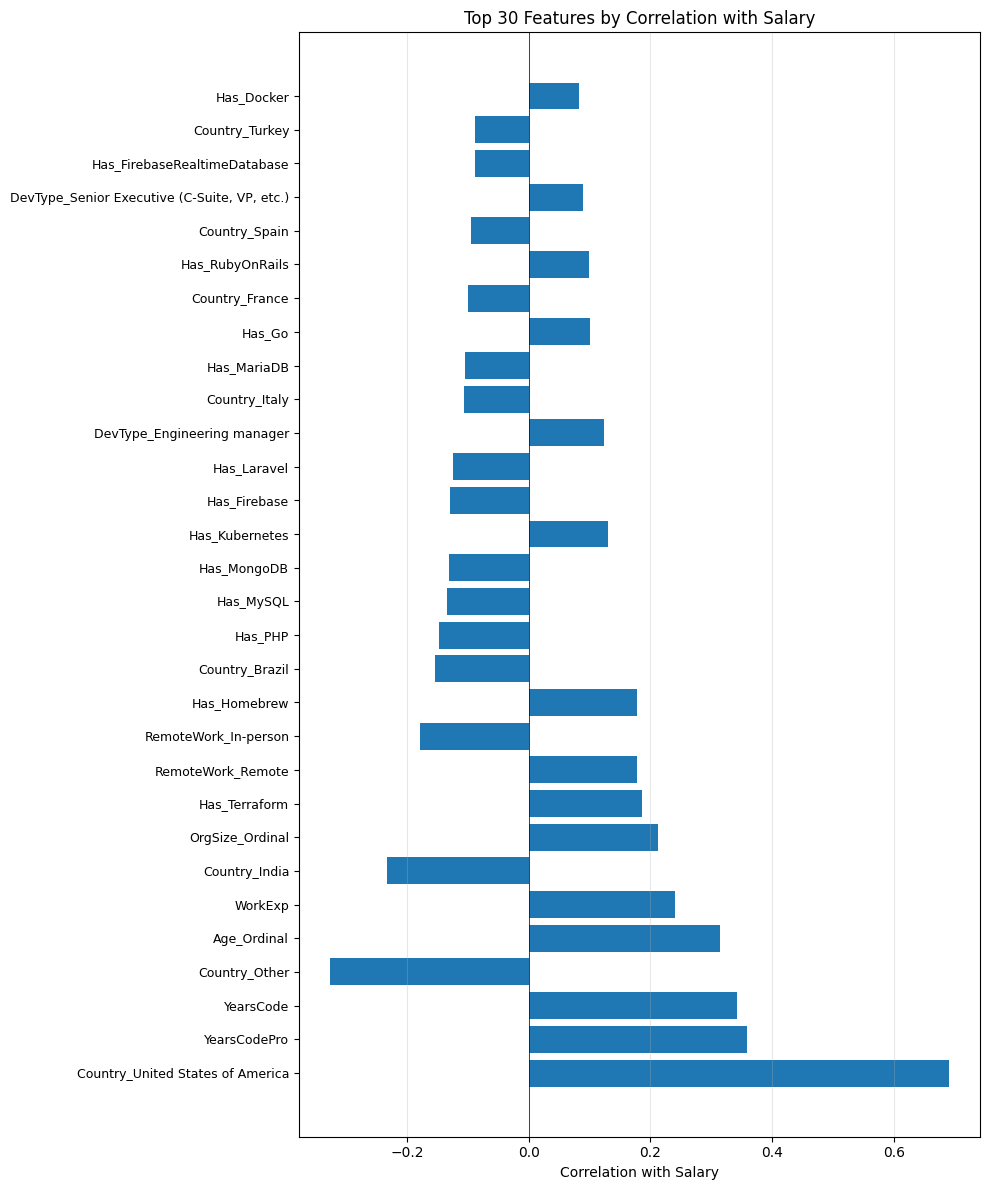

In [48]:
# Calculate correlation with target
correlations = X.corrwith(y).sort_values(ascending=False)

print("\n=== TOP 20 POSITIVE CORRELATIONS WITH SALARY ===")
print(correlations.head(20))

print("\n=== TOP 20 NEGATIVE CORRELATIONS WITH SALARY ===")
print(correlations.tail(20))

# Visualize top correlations
plt.figure(figsize=(10, 12))

# Get top 30 features by absolute correlation
top_features = correlations.abs().sort_values(ascending=False).head(30)
top_correlations = correlations[top_features.index]

plt.barh(range(len(top_correlations)), top_correlations.values)
plt.yticks(range(len(top_correlations)), top_correlations.index, fontsize=9)
plt.xlabel('Correlation with Salary')
plt.title('Top 30 Features by Correlation with Salary')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()



=== Checking for Multicollinearity ===

Highly correlated feature pairs (>0.8):
  YearsCodePro <-> YearsCode: 0.908
  YearsCodePro <-> Age_Ordinal: 0.802


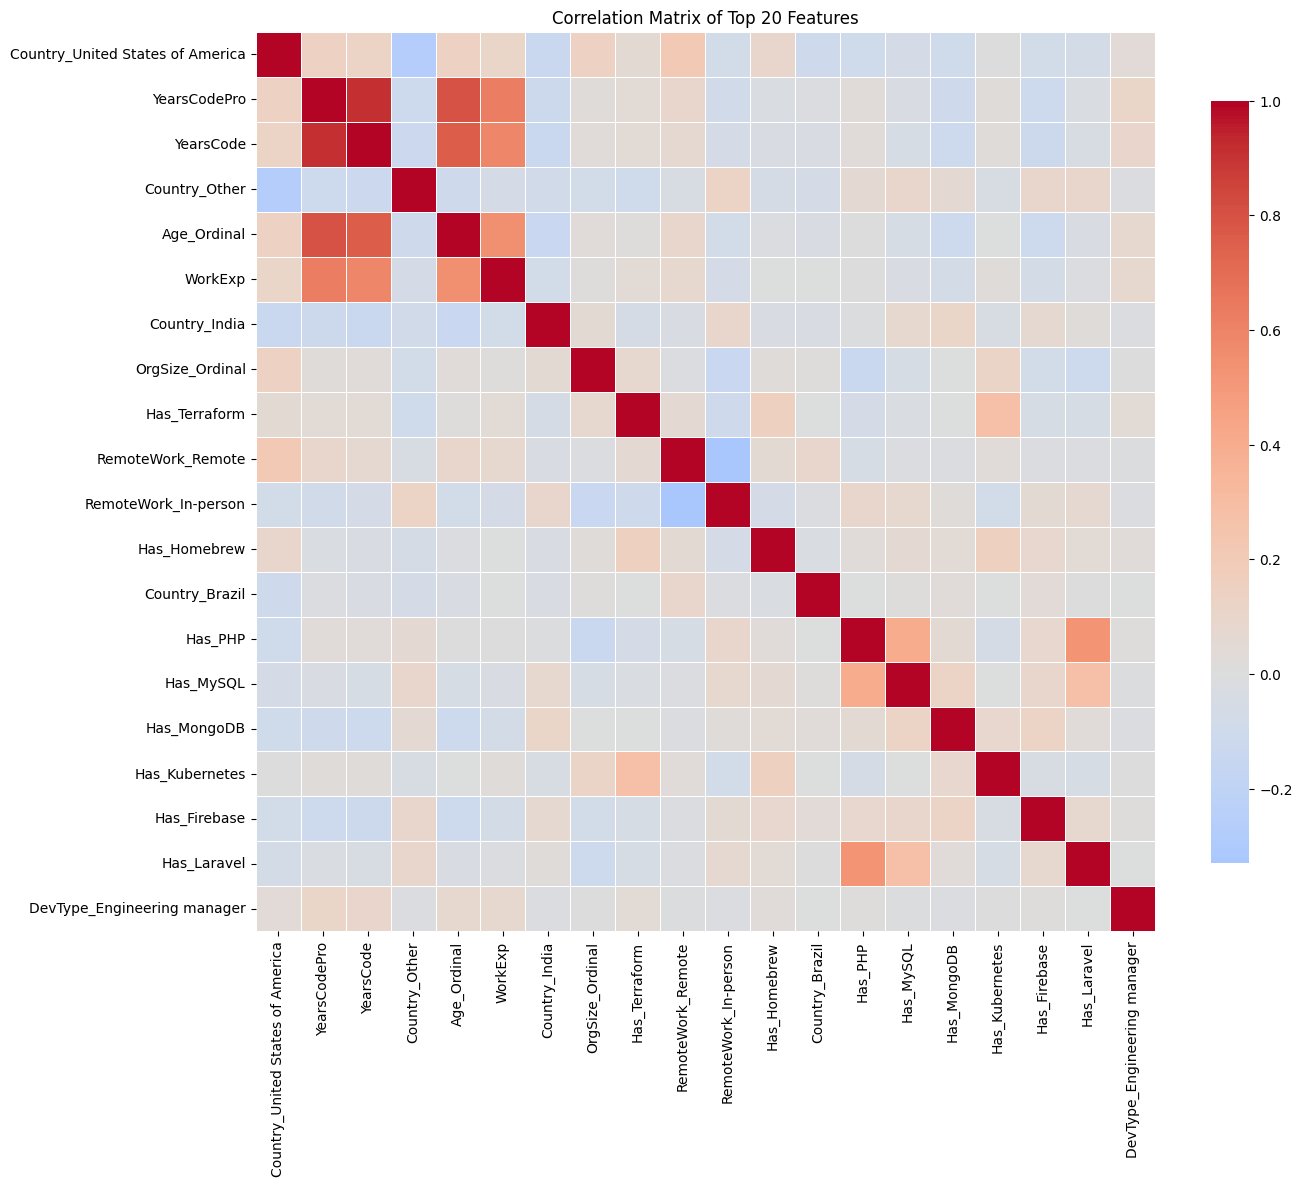

In [49]:
# Check for multicollinearity
print("\n=== Checking for Multicollinearity ===")
top_20_features = correlations.abs().sort_values(ascending=False).head(20).index.tolist()

# Correlation matrix for top features
feature_corr = X[top_20_features].corr()

# Find highly correlated feature pairs
high_corr_pairs = []

for i in range(len(feature_corr.columns)):
    for j in range(i + 1, len(feature_corr.columns)):
        if abs(feature_corr.iloc[i, j]) > 0.8:
            high_corr_pairs.append(
                (feature_corr.columns[i],
                 feature_corr.columns[j],
                 feature_corr.iloc[i, j])
            )

if high_corr_pairs:
    print("\nHighly correlated feature pairs (>0.8):")
    for feat1, feat2, corr in high_corr_pairs:
        print(f"  {feat1} <-> {feat2}: {corr:.3f}")
else:
    print("\nNo highly correlated feature pairs found (threshold: 0.8)")

# heatmap of features
plt.figure(figsize=(14, 12))
sns.heatmap(
    feature_corr,
    annot=False,
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title('Correlation Matrix of Top 20 Features')
plt.tight_layout()
plt.show()

In [50]:
df = df_model_fullTime2.drop(columns=["YearsCode", "WorkExp", "Age_Ordinal"])

In [51]:
X_reduced = X.drop(columns=["YearsCode", "WorkExp", "Age_Ordinal"])
print(f"Shape after dropping correlated features: {X_reduced.shape}")

Shape after dropping correlated features: (21182, 119)


## Training Machine Learning Model

The **Linear Regression model** from sklearn is trained to predict the annual compensation (in USD) based on the inputs.

The **target variable**:
- `ConvertedCompYearly` (annual salary in USD)

**Predictors** include:
- Years of professional coding experience
- Education level
- Country
- Employment type
- Type of developer job
- Technical knowledge required for the job (languages & technologies)

Train/Test split is used to evaluate the performance of the model.

In [52]:
X = df.drop(columns=["ConvertedCompYearly"])
y = df["ConvertedCompYearly"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Training set: (16945, 119)
Test set: (4237, 119)


In [53]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


## Performance of Machine Learning Model & Analysis
More than 70% of the outcomes are explained by the model, and the average error of the model is around $22 800 USD.

**R<sup>2</sup>** : ~ 0.72

**MAE** : ~ $22,800

Best controllable ways to increase salaries (no country changing) are presented in the following figures:

In general:

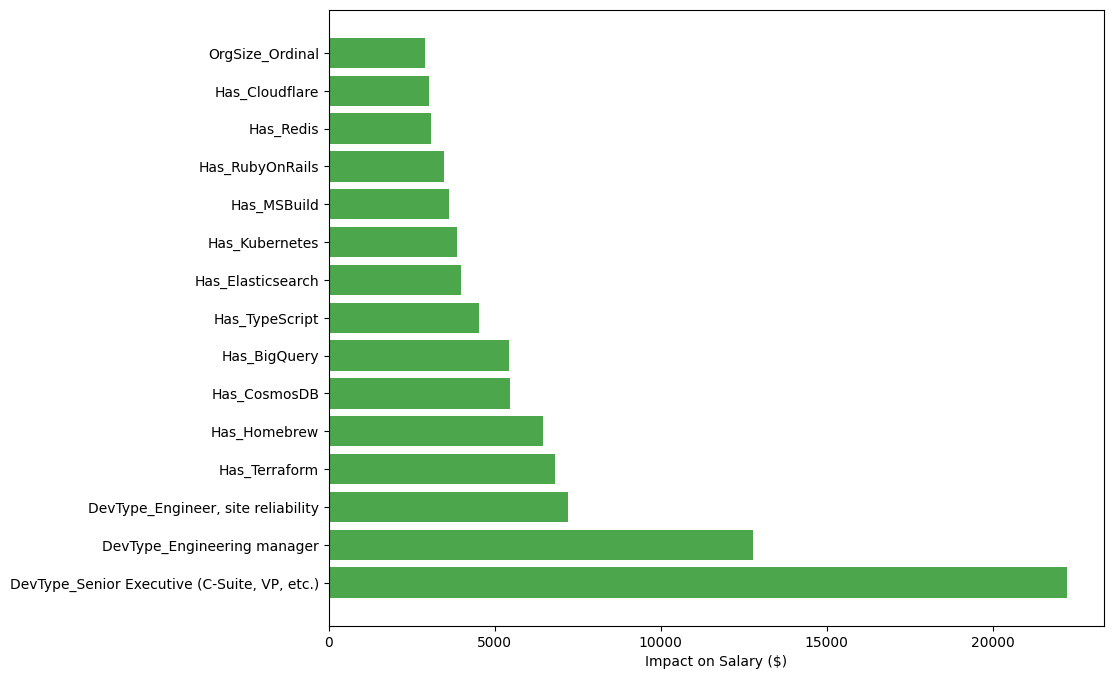

Only considering skills that can be learned:

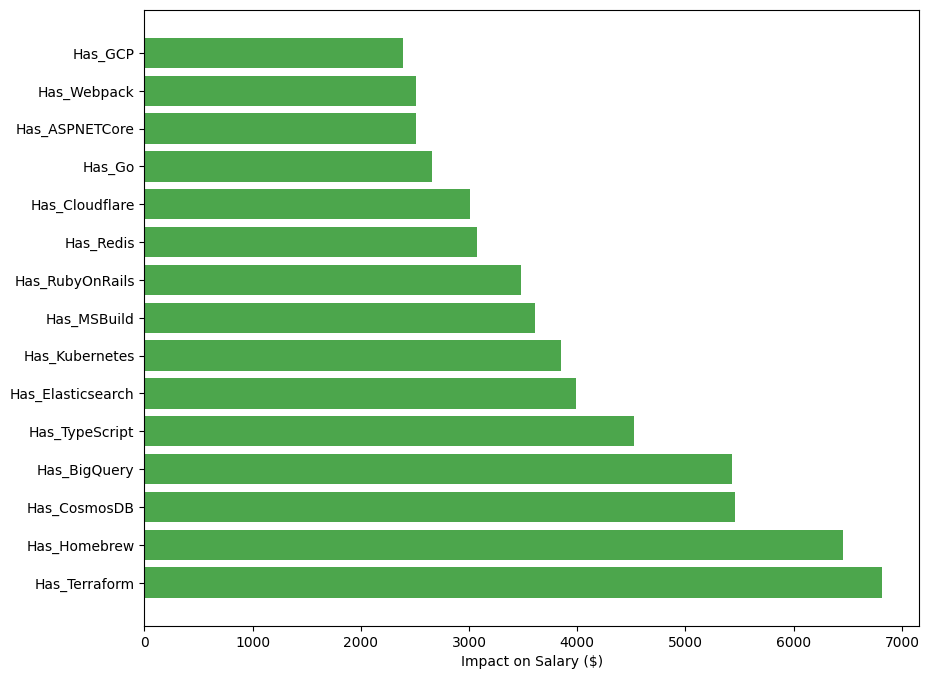


In [54]:
# Evaluate
print("\n=== MODEL PERFORMANCE ===")
print("\nTraining Set:")
print(f"R² Score: {r2_score(y_train, y_pred_train):.4f}")
print(f"MAE: ${mean_absolute_error(y_train, y_pred_train):.2f}")

print("\nTest Set:")
print(f"R² Score: {r2_score(y_test, y_pred_test):.4f}")
print(f"MAE: ${mean_absolute_error(y_test, y_pred_test):.2f}")

# Most important features (by coefficient magnitude)
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

coefficients['Abs_Coefficient'] = abs(coefficients['Coefficient'])
top_features = coefficients.nlargest(10, 'Abs_Coefficient')

print("\n=== TOP 10 MOST IMPACTFUL FEATURES ===")
print(top_features[['Feature', 'Coefficient']].to_string(index=False))



=== MODEL PERFORMANCE ===

Training Set:
R² Score: 0.7169
MAE: $22810.73

Test Set:
R² Score: 0.7137
MAE: $22776.97

=== TOP 10 MOST IMPACTFUL FEATURES ===
                         Feature   Coefficient
                  Country_Brazil -59375.014893
                   Country_India -58971.145911
Country_United States of America  55554.583962
                  Country_Turkey -54471.662039
            Country_South Africa -46618.900364
                 Country_Ukraine -45200.782621
                 Country_Romania -43991.988960
                   Country_Other -41606.716581
                   Country_Italy -40244.529630
                   Country_Spain -40041.212312



 Ways to increase salary:
                                     Feature  Coefficient
DevType_Senior Executive (C-Suite, VP, etc.) 22243.842536
                 DevType_Engineering manager 12769.363801
          DevType_Engineer, site reliability  7213.012374
                               Has_Terraform  6820.167400
                                Has_Homebrew  6451.509923
                                Has_CosmosDB  5457.731155
                                Has_BigQuery  5427.430922
                              Has_TypeScript  4520.484145
                           Has_Elasticsearch  3988.698005
                              Has_Kubernetes  3853.343480
                                 Has_MSBuild  3610.370418
                             Has_RubyOnRails  3476.504668
                                   Has_Redis  3072.222188
                              Has_Cloudflare  3007.024572
                             OrgSize_Ordinal  2898.687982


Text(0.5, 0, 'Impact on Salary ($)')

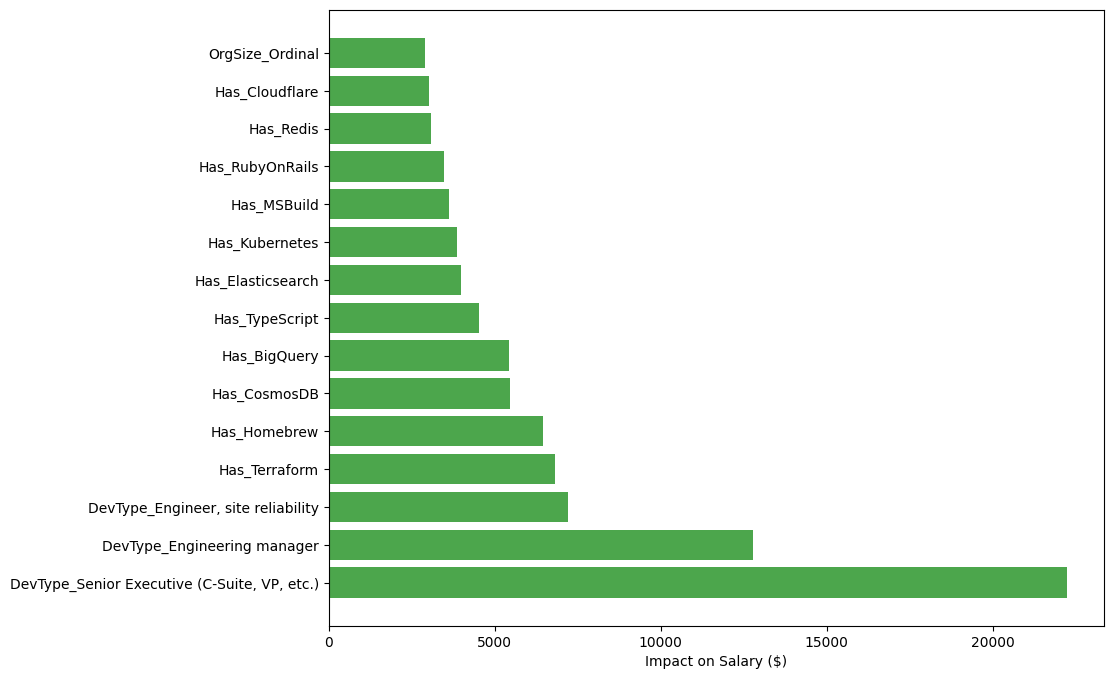

In [55]:
controllable_features = coefficients[
    (coefficients["Feature"].str.startswith("Has_")) |
    (coefficients["Feature"].str.startswith("DevType_")) |
    (coefficients["Feature"] == "YearsCodePro") |
    (coefficients["Feature"] == "OrgSize_Ordinal") |
    (coefficients["Feature"].str.startswith("RemoteWork_"))
].copy()

controllable_features = controllable_features.sort_values("Coefficient", ascending=False)

print("\n Ways to increase salary:")
print(controllable_features.head(15)[["Feature", "Coefficient"]].to_string(index=False))

plt.figure(figsize=(10,8))
top_controllable = controllable_features.head(15)
colors = ["green" if x > 0 else "red" for x in top_controllable["Coefficient"]]

plt.barh(range(len(top_controllable)), top_controllable["Coefficient"], color=colors, alpha=0.7)
plt.yticks(range(len(top_controllable)), top_controllable["Feature"], fontsize=10)
plt.xlabel("Impact on Salary ($)")


 Most Beneficial To Learn:
          Feature  Coefficient
    Has_Terraform  6820.167400
     Has_Homebrew  6451.509923
     Has_CosmosDB  5457.731155
     Has_BigQuery  5427.430922
   Has_TypeScript  4520.484145
Has_Elasticsearch  3988.698005
   Has_Kubernetes  3853.343480
      Has_MSBuild  3610.370418
  Has_RubyOnRails  3476.504668
        Has_Redis  3072.222188
   Has_Cloudflare  3007.024572
           Has_Go  2656.668123
   Has_ASPNETCore  2508.892332
      Has_Webpack  2508.618998
          Has_GCP  2389.878353


Text(0.5, 0, 'Impact on Salary ($)')

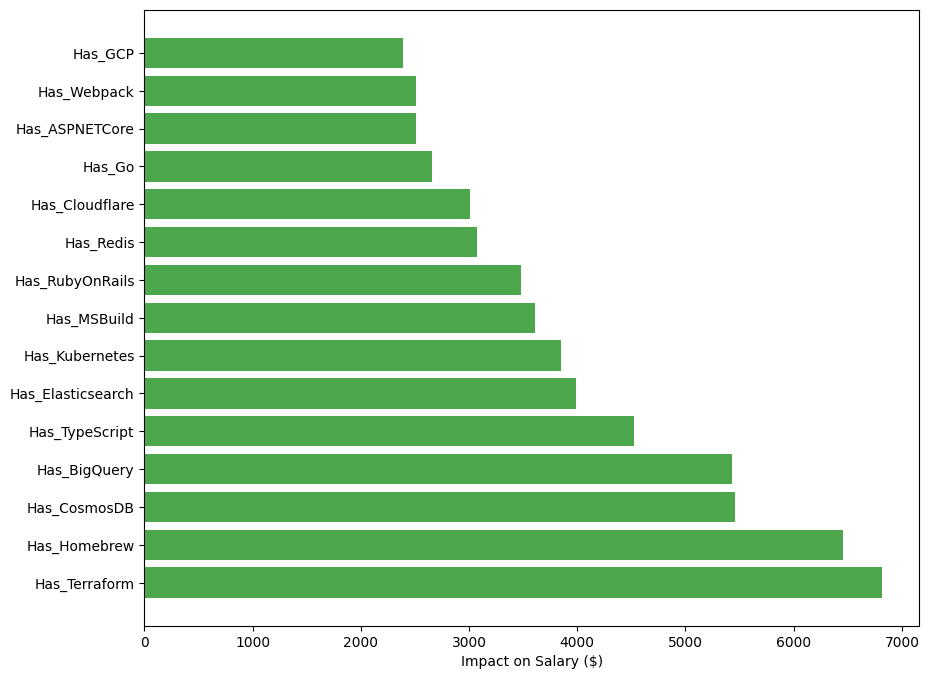

In [56]:
controllable_learning = coefficients[coefficients["Feature"].str.startswith("Has_")].copy()

controllable_learning = controllable_learning.sort_values("Coefficient", ascending=False)

print("\n Most Beneficial To Learn:")
print(controllable_learning.head(15)[["Feature", "Coefficient"]].to_string(index=False))

plt.figure(figsize=(10,8))
top_controllable = controllable_learning.head(15)
colors = ["green" if x > 0 else "red" for x in top_controllable["Coefficient"]]

plt.barh(range(len(top_controllable)), top_controllable["Coefficient"], color=colors, alpha=0.7)
plt.yticks(range(len(top_controllable)), top_controllable["Feature"], fontsize=10)
plt.xlabel("Impact on Salary ($)")

In [57]:
import pandas as pd
import numpy as np

# testing if prediction seems right

# template w/ all features used during training
input_data = pd.DataFrame(columns=X.columns)

# Define specific conditions
conditions = {
    'YearsCodePro': 10,
    'EdLevel_Ordinal': 5,       
    'OrgSize_Ordinal': 5,      
    'RemoteWork_Remote': True,
    'Canada': True,
    'Has_Python': 1,
    'Has_TypeScript': 1,
    'Has_Docker': 1,
    'DevType_Developer, full-stack': True
}

# Fill template with conditions
new_sample = pd.DataFrame([conditions], columns=X.columns).fillna(0)

# Ensure data types match
new_sample = new_sample.astype(X.dtypes.to_dict())

In [58]:
# Predict salary
predicted_salary = model.predict(new_sample)

print(f"Predicted Yearly Salary: ${predicted_salary[0]:,.2f}")

Predicted Yearly Salary: $108,783.82


In [59]:
import joblib

# Save trained model
joblib.dump(model, 'backend/salary_model.pkl')

# save the list of column names (X.columns)
joblib.dump(list(X.columns), 'backend/model_columns.pkl')

['backend/model_columns.pkl']